In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, distinct

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [5]:
engine.execute("select * from measurements limit 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70),
 (6, 'USC00519397', '2010-01-08', 0.0, 64),
 (7, 'USC00519397', '2010-01-09', 0.0, 68),
 (8, 'USC00519397', '2010-01-10', 0.0, 73),
 (9, 'USC00519397', '2010-01-11', 0.01, 64),
 (10, 'USC00519397', '2010-01-12', 0.0, 61)]

In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs INTEGER


In [7]:
engine.execute("select * from stations limit 5").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurements
Station = Base.classes.stations
session = Session(engine)

In [10]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [16]:
prcp_data = session.query(Measurement.date, func.avg(Measurement.prcp)).filter(Measurement.date > '2016-09-24').\
    group_by(func.strftime("%m", Measurement.date)).order_by(Measurement.date).all()
prcp_data[:5]

[('2016-09-30', 0.19447368421052627),
 ('2016-10-31', 0.12162011173184363),
 ('2016-11-30', 0.12023391812865498),
 ('2016-12-31', 0.19949438202247205),
 ('2017-01-31', 0.07029411764705883)]

In [26]:
# Unpack the dates and meaasurements into separate lists
Dates = [row[0] for row in prcp_data]
Precipitation = [row[1] for row in prcp_data]
# Create the dataframe using the lists
df = pd.DataFrame(prcp_data, columns=['Dates', 'Precipitation'])
df.set_index('Dates', inplace=True)
df.head(5)

,Precipitation
Dates,
2016-09-30,0.194474
2016-10-31,0.121620
2016-11-30,0.120234
2016-12-31,0.199494
2017-01-31,0.070294


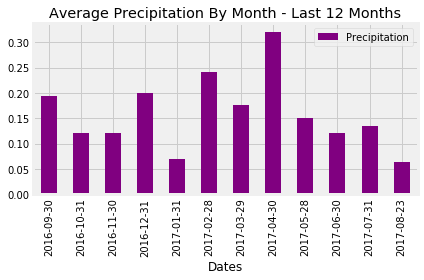

In [27]:
df.plot.bar(title="Average Precipitation By Month - Last 12 Months", color="purple")
plt.tight_layout()
plt.show()

In [20]:
station_total = session.query(func.count(distinct(Station.station))).all()
station_total

[(9)]

In [21]:
# List of stations based on number of observations
counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by((func.count(Measurement.station).desc())).all()
counts

[('USC00519281', 5544),
 ('USC00513117', 5392),
 ('USC00519397', 5370),
 ('USC00519523', 5144),
 ('USC00516128', 4968),
 ('USC00514830', 3874),
 ('USC00511918', 3864),
 ('USC00517948', 1366),
 ('USC00518838', 684)]

In [24]:
tobs_data = session.query(Measurement.station, func.avg(Measurement.tobs), func.count(Measurement.station)).\
    filter(Measurement.date > '2016-09-24').group_by(Measurement.station).\
    order_by((func.count(Measurement.station).desc())).all()
tobs_data[:5]

[('USC00519397', 74.8780487804878, 656),
 ('USC00519281', 72.65203761755485, 638),
 ('USC00513117', 72.92903225806451, 620),
 ('USC00516128', 71.79797979797979, 594),
 ('USC00519523', 76.74204946996467, 566)]

In [29]:
# Unpack into separate lists
stations = [row[0] for row in tobs_data]
frequency = [row[2] for row in tobs_data]

[656, 638, 620, 594, 566, 486, 106]

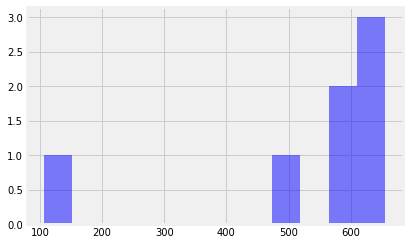

In [30]:
x = frequency
num_bins = 12
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()